The aim of this notebook is to visualize the effects of some of the transformations.

In [1]:
import sys 
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

from types import SimpleNamespace
from monai.data import DataLoader, Dataset
from monai.utils import first

from src.transforms import get_ssl_transforms

In [3]:
args = SimpleNamespace(**{
    'a_min': -500, 'a_max': 500, 
    'size_x': 1.0, 'size_y': 1.0, 'size_z': 2.5,
    'min_iou': 0.95, 'max_iou': 1.0 
})

transforms = get_ssl_transforms(args, mode='full')

The following transforms pipeline will be used: [<monai.transforms.io.dictionary.LoadImaged object at 0x7f98bcf21a50>, <monai.transforms.utility.dictionary.EnsureChannelFirstd object at 0x7f98bcf23880>, <monai.transforms.spatial.dictionary.Orientationd object at 0x7f98bcf23b50>, <monai.transforms.spatial.dictionary.Spacingd object at 0x7f98bcf238b0>, <monai.transforms.intensity.dictionary.ScaleIntensityRanged object at 0x7f98bcf20730>, <monai.transforms.croppad.dictionary.CropForegroundd object at 0x7f98bcf209d0>, <monai.transforms.croppad.dictionary.SpatialPadd object at 0x7f98bcf206a0>, <monai.transforms.utility.dictionary.EnsureTyped object at 0x7f992621b3a0>, <src.transforms.IoUCropd object at 0x7f98bcf23190>, <monai.transforms.utility.dictionary.EnsureTyped object at 0x7f98bcf22c20>, <monai.transforms.spatial.dictionary.RandZoomd object at 0x7f98bcf23160>].


/home/ditto/envs/sslct/lib/python3.10/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


In [4]:
data = [
    {
        'img': '../data/ssl/FLARETs_0047_0000.nii.gz'
    },
    {
        'img': '../data/ssl/FLARETs_0048_0000.nii.gz'
    },
    {
        'img': '../data/ssl/FLARETs_0049_0000.nii.gz'
    }
]

In [5]:
check_ds = Dataset(data=data, transform=transforms)
check_loader = DataLoader(check_ds, batch_size=1)

In [6]:
check_data = first(check_loader)
img = check_data['img'][0][0]

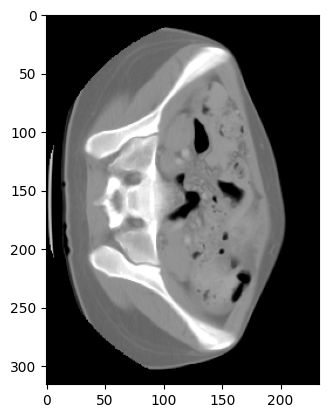

In [7]:
plt.imshow(check_data['img'][0][0][:, :, 50], cmap='gray', vmin=0, vmax=1)

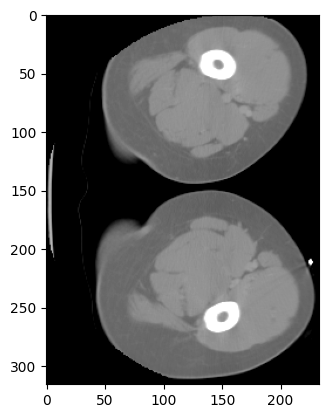

In [8]:
plt.imshow(check_data['img'][0][0][:, :, 0], cmap='gray', vmin=0, vmax=1)

[tensor([108]), tensor([150]), tensor([31]), tensor([204]), tensor([246]), tensor([127])]


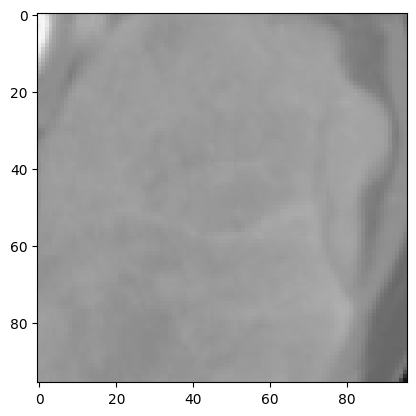

In [11]:
print(check_data['img1_coords'])
plt.imshow(check_data['img1'][0][0][:, :, 25], cmap='gray', vmin=0, vmax=1)

[tensor([109]), tensor([149]), tensor([31]), tensor([205]), tensor([245]), tensor([127])]


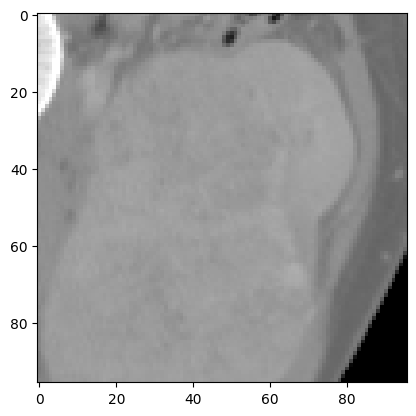

In [10]:
print(check_data['img2_coords'])
plt.imshow(check_data['img2'][0][0][:, :, 25], cmap='gray', vmin=0, vmax=1)